## Introduction

Introduction: The purpose of this project to examine whether socio-economic factors have a impact on students educational outcomes. This project will focus on students ACT/SAT scores relative to their socio-economic status.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Maps
import altair as alt
from vega_datasets import data
import geopandas as gpd

!pip install addfips
import addfips
af = addfips.AddFIPS()

import folium
from folium import plugins
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load clean data

In [ ]:
df_test = pd.read_csv('https://docs.google.com/spreadsheets/d/156pKOmxUZgzvA6sf0wG_9cbz2NuQZ5eWJz5M9MsTc1k/export?format=csv')

In [ ]:
df_train = pd.read_csv('https://docs.google.com/spreadsheets/d/1n7ouHhXcxWGgqmUwAtKprsvpmESdqL3rLz-8bmQ69hQ/export?format=csv')

##### $\rightarrow$ Review the contents of the data set.

In [ ]:
df_train.head()

index  rate_unemployment  percent_college  percent_married  median_income  \
0      0          -0.034288        -0.459028         0.699620      -0.078261   
1      1           0.269392        -0.912354        -0.820283      -0.545151   
2      2           0.109200        -0.485752         0.191013      -0.517867   
3      3          -0.718887         1.931055         0.404520       0.998777   
4      4          -0.078118         1.949355         1.187137       5.099859   

   percent_lunch  average_act       year state  zip_code     school_type  \
0      -0.571427    19.300000  2016-2017    MI     49451  Regular School   
1       1.003646    17.735043  2016-2017    NC     28052  Regular School   
2      -0.337332    20.794872  2016-2017    IN     47348  Regular School   
3      -1.266100    22.912088  2016-2017    PA     19038  Regular School   
4      -1.659628    27.136752  2016-2017    NJ      8558  Regular School   

  school_level            id  
0         High  262937006516  
1         High  370162000691  
2         High  180057000102  
3         High  422262003376  
4         High  341059005250

In [ ]:
df_test.head()

index  rate_unemployment  percent_college  percent_married  median_income  \
0      0           0.250948         1.810438         1.329413       1.154974   
1      1           1.842540        -0.686676         0.524656      -0.494896   
2      2           1.235343        -1.461979        -2.157788      -1.028212   
3      3          -0.430128        -0.270706        -0.901727      -0.923182   
4      4           1.128413        -1.295393        -1.402775      -1.408482   

   percent_lunch  average_act       year state  zip_code     school_type  \
0      -1.585649    24.300000  2016-2017    IL     60134  Regular School   
1      -0.118072    23.278388  2016-2017    NC     28655  Regular School   
2       1.383672    17.600000  2016-2017    LA     71019  Regular School   
3      -0.190838    21.319902  2016-2017    IN     46563  Regular School   
4       1.034002    21.349206  2016-2017    TX     75203  Regular School   

  school_level            id  
0         High  171638001955  
1         High  370048002832  
2         High  220132001090  
3         High  180906001500  
4         High  481623001225

In [ ]:
df_train.shape

(5474, 13)

In [ ]:
df_test.shape

(2346, 13)

## State your questions

**1.** What is a way to determine if socioeconomic factors correlated to ACT performance?

**2.** Is there certain socioeconomic measures that are particularly impactful?

**3**. If they are correlated how much does socioeconomic factors affect ACT performance

**Additional Step Question**: Does the impact of socioeconmic factors vary by state/region?

## Analysis

The code below determines feature selection, fits the training dataset and visualizes the regression plot

In [ ]:
X_train = df_train[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']]
y_train = df_train["average_act"]

In [ ]:
X_test = df_test[['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']]
y_test = df_test["average_act"]

I decided to include the majority of numerical features (excluding zip_code) and non-relevant features like "ID". Even though median income is the least correlated (as shown below) I still wanted to include it and look at it individually later on.

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
print(reg.intercept_, reg.coef_)

20.205412627329405 [-0.16398081  0.24207381 -0.02474446  0.00652321 -1.81688461]


Looking at these coefficents we can see that percent_lunch has the highest correlation followed by percent_college, rate_unemployment, percent_married and finally median_income

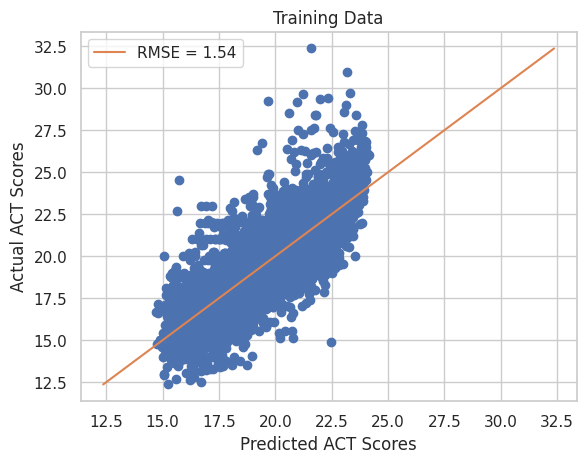

In [ ]:
y_pred = reg.predict(X_train)
one = np.linspace(y_train.min(), y_train.max(), 100)
rmse = np.sqrt(np.mean((y_pred - y_train)**2))

fig, ax = plt.subplots()
plt.title("Training Data")
ax.plot(y_pred, y_train, 'o')
ax.plot(one, one, '-', label = f"RMSE = {rmse:.2f}")
ax.set_xlabel("Predicted ACT Scores")
ax.set_ylabel("Actual ACT Scores")
ax.legend()

This code does the same as the code above but for the test dataset so that it can be compared to the training regression plot

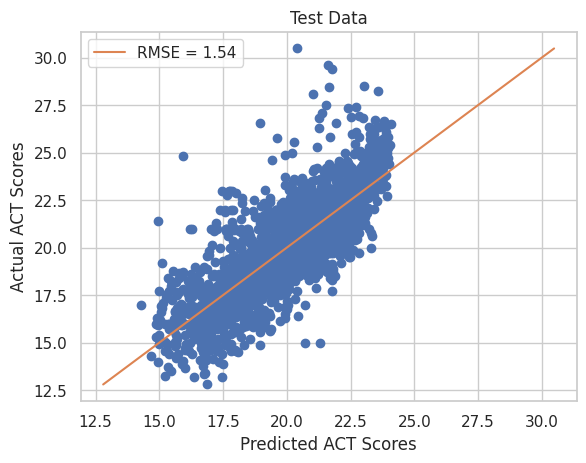

In [ ]:
y_pred = reg.predict(X_test)
one = np.linspace(y_test.min(), y_test.max(), 100)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))

fig, ax = plt.subplots()
plt.title("Test Data")
ax.plot(y_pred, y_test, 'o')
ax.plot(one, one, '-', label = f"RMSE = {rmse:.2f}")
ax.set_xlabel("Predicted ACT Scores")
ax.set_ylabel("Actual ACT Scores")
ax.legend()

As we can see in the produced chart there is a fairly strong relationship. While we can see that the estimate is obviously not perfect, a student's ACT score does have a linear relationship with their socioeconomic standings. With a RMSE of 1.54 (compared to the scale of ACT scores of 1-35) We can see that the model can be a good indicator of how a student will score.

This code un-normalizes the data so that it can be used in further data exploration and visualization

In [ ]:
num_features = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']

df_std = pd.Series({
    'rate_unemployment': 0.058102,
    'percent_college': 0.165589,
    'percent_married': 0.194770,
    'median_income': 24117.053330,
    'percent_lunch': 0.235813
}, name='std_dev')

df_mean = pd.Series({
    'rate_unemployment': 0.09812036507,
    'percent_college': 0.5695219026,
    'percent_married': 0.6353453337,
    'median_income': 52162.43564,
    'percent_lunch': 0.4221398755,
}, name='mean')

#Un-normalize the numeric features data
df_train[num_features] = df_train[num_features] * df_std + df_mean

#Create a copy
df = df_train.copy()
df.head()


index  rate_unemployment  percent_college  percent_married  median_income  \
0      0           0.096128         0.493512         0.771610   50274.999999   
1      1           0.113773         0.418446         0.475579   39014.999999   
2      2           0.104465         0.489087         0.672549   39672.999999   
3      3           0.056352         0.889283         0.714134   76249.999997   
4      4           0.093582         0.892314         0.866564  175155.999980   

   percent_lunch  average_act       year state  zip_code     school_type  \
0       0.287390    19.300000  2016-2017    MI     49451  Regular School   
1       0.658813    17.735043  2016-2017    NC     28052  Regular School   
2       0.342593    20.794872  2016-2017    IN     47348  Regular School   
3       0.123577    22.912088  2016-2017    PA     19038  Regular School   
4       0.030778    27.136752  2016-2017    NJ      8558  Regular School   

  school_level            id  
0         High  262937006516  
1         High  370162000691  
2         High  180057000102  
3         High  422262003376  
4         High  341059005250

This chart is an intital look at how median income may impact ACT performance

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

alt.Chart(df).mark_circle().encode(
    alt.X('median_income', title = 'Median Income'),
    alt.Y('average_act', bin=alt.BinParams(maxbins=15),title = "Average ACT Score"),
)

alt.Chart(...)

We can see that low income is generally associated with lower ACT performance but the benefit of having a higher income trails off around the $160,000 mark

The plot below was made to better visualize the impact that median income has ACT performance by using color encodings and bins. The aim was to make it less effort to interpret

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

alt.Chart(df, title = '').mark_rect().encode(
    alt.Color('median_income:Q',
              bin=alt.BinParams(maxbins=10),
              title = 'Median Income'
      ),
    alt.Y('average_act:Q',
          title = 'ACT Score',
          axis=alt.Axis(
               orient='right',
               titleX=7,
               titleY=-8,
               titleAlign='center',
               titleAngle=0 ),
          bin=alt.BinParams(maxbins=15)),
    )

alt.Chart(...)

We can see that median income does seem to impact a student's ACT performance. Scores in the higher range (20+) are generally darker (higher income) than low scores. However it is not a perfect relationship and the benefit of having a higher income seems to be less impactful after 100k-150k. We can theorize that after a certain income level is reached the same resources and education are available to people but we cannot be sure.  That being said, the scores in the top range of 32-35 are also the students with the highest income level.

The code below is a exploratory plot looking at the impact that recieving free lunch (which generally means the student comes from a lower income family) has on ACT performance

In [ ]:
alt.data_transformers.enable('default', max_rows=None)

alt.Chart(df, title = 'ACT Score Compared to Students who Recieve Free Lunch').mark_rect().encode(
    alt.Color('percent_lunch:Q',
              bin = True,
              title = 'Free Lunch (%)'),
    alt.Y('average_act:Q' , title = 'Average ACT', axis=alt.Axis(orient='right', title=None))

    )

alt.Chart(...)

## Additional Step

This code loads a geoseries file

In [ ]:
countydf = gpd.read_file(
    data.us_10m.url,
    driver='TopoJSON'
)

This code looks at the different states that are reported in the EdGap data

In [ ]:
df['state'].unique()

array(['MI', 'NC', 'IN', 'PA', 'NJ', 'NY', 'LA', 'WA', 'WI', 'TN', 'GA',
       'MO', 'OH', 'TX', 'FL', 'IL', 'MA', 'WY', 'KY', 'DE'], dtype=object)

As we can see there are around 20 out of the 50 states reported which means that we will have an incomplete map but can still gather valuable data from it

The code below appends the dataset to add a column of FIPS which are unique codes that are applied to each state in order to map the data

In [ ]:
df["FIPS"] = df.apply(lambda x: af.get_state_fips(x["state"]), axis=1)
df['FIPS'] = df['FIPS'].str.lstrip('0')
df.head()

index  rate_unemployment  percent_college  percent_married  median_income  \
0      0           0.096128         0.493512         0.771610   50274.999999   
1      1           0.113773         0.418446         0.475579   39014.999999   
2      2           0.104465         0.489087         0.672549   39672.999999   
3      3           0.056352         0.889283         0.714134   76249.999997   
4      4           0.093582         0.892314         0.866564  175155.999980   

   percent_lunch  average_act       year state  zip_code     school_type  \
0       0.287390    19.300000  2016-2017    MI     49451  Regular School   
1       0.658813    17.735043  2016-2017    NC     28052  Regular School   
2       0.342593    20.794872  2016-2017    IN     47348  Regular School   
3       0.123577    22.912088  2016-2017    PA     19038  Regular School   
4       0.030778    27.136752  2016-2017    NJ      8558  Regular School   

  school_level            id FIPS  
0         High  262937006516   26  
1         High  370162000691   37  
2         High  180057000102   18  
3         High  422262003376   42  
4         High  341059005250   34

This code creates two maps
1. Looks at the percentage of students that receive free lunch
2. Looks at the average ACT performance for each state


Then they are color encoded by saturation (gray if the state is null), added tooltips in order to identify the states and then plotted side by side for easier comparison

In [ ]:
states = alt.topo_feature(data.us_10m.url, 'states')

#creating socioeconomic (free lunch) map
income = alt.Chart(states).mark_geoshape().encode(
    color=alt.condition(
        #checks if there's data for the state
        'isValid(datum.percent_lunch)',
        alt.Color("percent_lunch:Q",
                  bin=alt.BinParams(maxbins=15),
                  title='Free Lunch (% of students)',
                  scale=alt.Scale(scheme='orangered')),
        #makes null values gray
        alt.value('lightgray')),
    tooltip=[alt.Tooltip('state:N')]
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'FIPS', ['percent_lunch', 'state']),
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

#creating ACT score map
act = alt.Chart(states).mark_geoshape().encode(
    color=alt.condition(
        'isValid(datum.average_act)',
        alt.Color("average_act:Q",
                  bin=alt.BinParams(maxbins=15),
                  title='Average ACT Score',
                  scale=alt.Scale(scheme='orangered')),
        alt.value('lightgray')),
    tooltip=[alt.Tooltip('state:N')]
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'FIPS', ['average_act', 'state']),
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

#plots maps side by side
(income | act).resolve_scale(color='independent')


alt.HConcatChart(...)

From this chart we can see that states where a lot of students receive free lunch generally perform worse on the ACT. Specific examples of this can be seen in Tennessee and Florida where the percentage of students receiving free lunch is in the highest category and the average ACT performance is in the lowest. Conversely New Jersey has one of the lowest scores for free lunch and one of the highest average ACT scores

## Conclusion

After examining this data we can conclude that socioeconomic factors do affect ACT performance. However, the impact that each socioeconomic factor has on a student's ACT score varies and the difference in ACT does increase/decrease equally with socioeconomic circumstances. For instance, the percentage of students who receive free lunch has a strong negative correlation with ACT performance while median income seems to have a much weaker effect. This can be seen in the feature selection section as well as the visualizations. And while having a higher median income is positively correlated with ACT performance it doesn't benefit scores nearly as much after the median income surpasses a certain amount.